## Cell cluster for assigning to 5 layers of H&E stain

In [1]:
import pandas as pd
import numpy as np

# !pip install scikit-image
from skimage import data

import sys
sys.path.append('../../source_code/')
from scGCO_source import *

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Rep11_processing: (265, 12522)


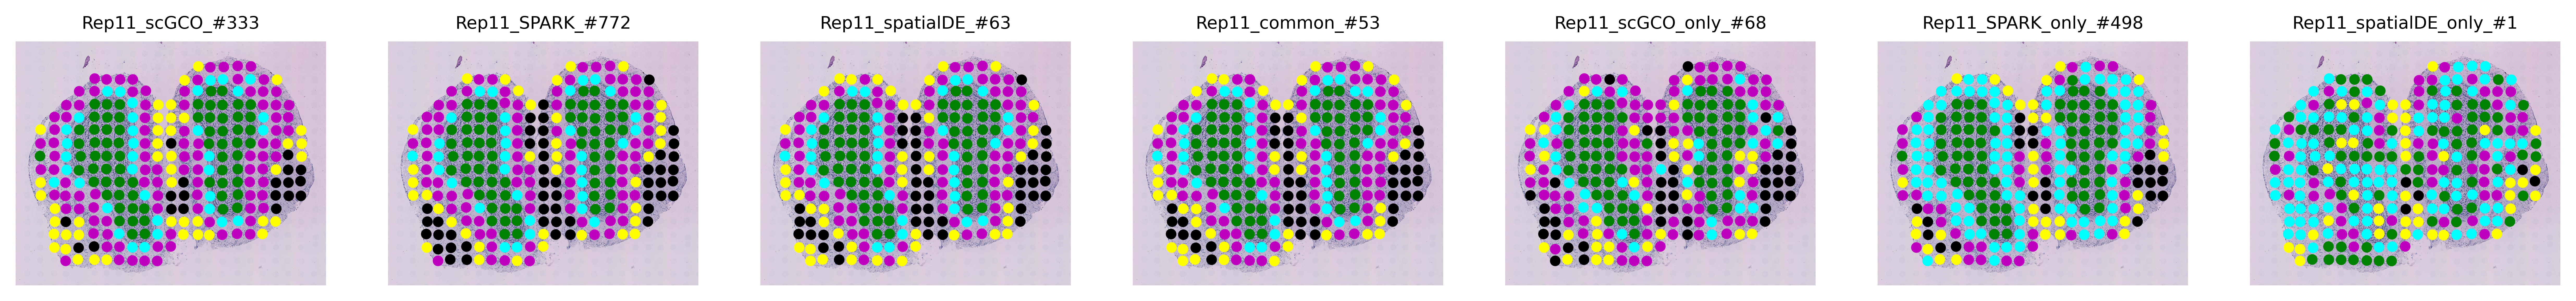

In [2]:
## hmrf_labels  11  comparing with SPARK

j=11
data_norm = pd.read_csv('../../../Temp_files/data_norm_new/Rep'+str(j)+'_data_norm_new.csv',
                       index_col=0)
locs= Get_coord(data_norm)
print('Rep{}_processing: {}'.format(j,data_norm.shape))


exp=data_norm.iloc[:,0].values
cellGraph=create_graph_with_weight(locs, exp)

result_df =read_result_to_dataframe(
    '../../../results/MouseOB/scGCO_results//Rep{}_result_df.csv'.format(j))
scgco = result_df[result_df.fdr<0.05]
scGCO=scgco.index

spark = pd.read_csv('../../../results/MouseOB/SPARK_results/Rep'+str(j)+'_MOB_spark.csv')
SPARK =set(spark.genes.values)&set(data_norm.T.index.values)

de='../../../results/MouseOB/SpatialDE_results/MOB_'+str(j)+'_DE.csv'
de = pd.read_csv(de)
spatialDE=set(de.g.values)&set(data_norm.T.index.values)

common=set(scGCO)&set(SPARK)&set(spatialDE)&set(data_norm.T.index.values)
scGCO_only=(set(scGCO)-set(SPARK)-set(spatialDE))&set(data_norm.T.index.values)
spatialDE_only = (set(spatialDE) - set(scGCO)- set(SPARK)-set(common))&set(data_norm.T.index.values)
SPARK_only=(set(SPARK)-set(scGCO)-set(spatialDE)-set(common))&set(data_norm.T.index.values)

gene_df=['scGCO','SPARK','spatialDE','common','scGCO_only','SPARK_only','spatialDE_only']

if True:
    nrows=1
    ncols=7

    fig,ax=plt.subplots(nrows,ncols,figsize=(ncols*3,nrows*3),dpi=(600))   ## dpi=300
    for i,geneNames in enumerate(gene_df):
        genelist=eval(geneNames)
        kmeans_labels,hmrf_labels=create_labels(locs,data_norm,genelist,cellGraph,
                                                cluster_size=5,
                                               unary_scale_factor=100,
                                               smooth_factor=10,rs=150)

        image='../../../data/Raw_data/HE-MOB-breast_cancer/HE_Rep{}_MOB.jpg'.format(j)
        title='Rep{}_{}_#{}'.format(j,geneNames,len(genelist))  #,exp_cutoff)
        if i==0:
            colors=['k','cyan','g','m','yellow']
        if i==1:
            colors=['yellow','cyan','m','k','green']
        if i==2:
            colors=['yellow','m','cyan','k','g']
        if i==3:
            colors=['yellow','cyan','green','k','m'] 
        if i==4:
            colors=['yellow','m','cyan','k','g']
        if i==5:
            colors=['cyan','m','g','yellow','k']
        if i==6:
            colors=['g','m','k','cyan','yellow']
        axes=ax[i]
        subplot_HE_with_labels(locs,hmrf_labels,image,axes,colors,title,s=15)
        axes.axis('off')
    plt.show()

In [3]:
fig.savefig('../../../results/Figure/Supple_Fig8-Rep11_tissue_structure.pdf')